# PfDA Project
***

Simply put, the purpose of this project is to examine a number of variables that have a direct impact on an outcome (another variable). These variables are to be taken from real world data. An example of the minimum data required from the example given in the project description is to use at least 4 variables, e.g. 'w', 'x', 'y' and 'z' and examine their impact on an outcome variable 'v'.
A random generator is then used to simulate new data (the dice roll example taken from 'Fundamentals of Data Analytics' can be used as a reference or even the 'pie' generator once this can be linked to an outcome that will provide realistic information required for 'x', 'y' and 'z' which in turn will provide an outcome for 'v' every time the code is executed). I may build my own generator if I find I have time otherwise I may utilise one of the python packages. 
I will then analyse this data by utilising statistical models and plots available. I should also figure out which distribution is applicable.

1. Choose a data set
2. Investigate the relationship of the variables to each other and to an outcome
3. Synthesize/ simulate data based on the data set - use a random generator
4. Analyse again as per point 2 and details any correlations

## 1. Choose a data set  
***

After some research into appropriate applicable data sets I have decided to research and analyse the topic of suicide. Suicide is a leading cause of death, especially among young people and what is astounding is that more people die by suicide than by homicide, in fact almost twice as many. Much of the data and information for this project was taken from OurWorldinData - https://ourworldindata.org/suicide

Huge increases have been seen in the number of deaths by suicide year on year. In 2017 around 800,000 deaths by suicide were reported. This is twice as many as the number of deaths by homicide (400,000), more than 7 times as many as the number of deaths by conflict (125,000) and around 30 times as many as the number of deaths by terrorism (25,000). By 2020 the number of deaths by suicide rose to over 1,000,000.
Suicide tends to affect more males than females and geographical location also plays a part with Europe and America most hit. Age is another big factor which seem to have a relationship to deaths by suicide.
https://apps.who.int/gho/data/node.sdg.3-4-viz-2?lang=en

A number of variables of interest were examined and compiled into a single .csv file. The figures chosen were from 2017 data sets available on the OurWorldinData link - https://ourworldindata.org/suicide.
These values were taken from 3 different .csv files that were downloaded from the above site and trended the data against country (this being the common variable across the files and the chosen 'index').
1. suicide-death-rates (per 100,000 sample size)
2. suicide-rates-by-age-detailed (per 100,000 sample size)
3. suicide-death-rates-by-sex (per 100,000 sample size)
These statistics were then compiled into a single .csv file after filtering out the desired information. This .csv file is the file that will be used for the analysis of this project.
Each of the variables listed above were chosen to assess the relationships to suicide rates. 

### Import Dataset

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\35387\Program\repos\gitIntro\Programming\PfDA_Project\SuicideRates.csv")
data

Country  Suicide rates  Age: 70+ years  \
0                       Afghanistan           6.29            9.40   
1              African Region (WHO)          10.45           45.70   
2                           Albania           5.03            8.44   
3                           Algeria           3.55            5.52   
4                    American Samoa           7.44           12.46   
..                              ...            ...             ...   
223  World Bank Lower Middle Income          10.00           20.50   
224  World Bank Upper Middle Income           8.07           28.66   
225                           Yemen           5.97            7.86   
226                          Zambia          14.44           61.28   
227                        Zimbabwe          24.29           84.05   

     Age: 50-69 years  Age: 15-49 years   Age: 5-14 years  \
0               10.07               7.49             0.24   
1               21.47               7.47             0.60   
2                5.51               7.13             0.73   
3                3.53               5.20             0.27   
4                7.47              10.70             0.54   
..                ...                ...              ...   
223             13.79              12.83             0.73   
224             12.61               8.71             0.51   
225              7.76               8.07             0.39   
226             31.47               9.59             0.82   
227             47.59              21.36             0.29   

     Female suicide rate  Male suicide rate  
0                   4.63              13.99  
1                   4.63              14.15  
2                    NaN                NaN  
3                   2.94               7.35  
4                   2.23               5.99  
..                   ...                ...  
223                 4.05              10.70  
224                 5.76              20.60  
225                  NaN                NaN  
226                 3.93               7.96  
227                 3.45              16.78  

[228 rows x 8 columns]

In [6]:
data.iloc[0:222,7]
# executing the above code for each column we can see that the column 1 is an 'object' i.e. a string while every other column is a float
# we can also see that there are a few blanks being returned as 'NaN'
# an interesting simulation we may be able to do is to try and predict the male/ female suicide rates for a different year where there information above is not so readily available
# we can then model this new breakdown against the breakdown given here
# this will probably have to be done after we fill in the above blanks
# this can also be done by predicting the breakdown based off of male/ female suicide rates of other countries
# of course this will not bbbe "true data" butbut it should be a good estimation of what we exxpect based off of a standard deviation


0      13.99
1      14.15
2        NaN
3       7.35
4       5.99
       ...  
217    13.93
218     4.95
219    18.67
220     8.36
221    14.32
Name: Male suicide rate, Length: 222, dtype: float64

## 2. Investigate the relationship of the variables to each other and to an outcome
***

In [7]:
import seaborn as sns

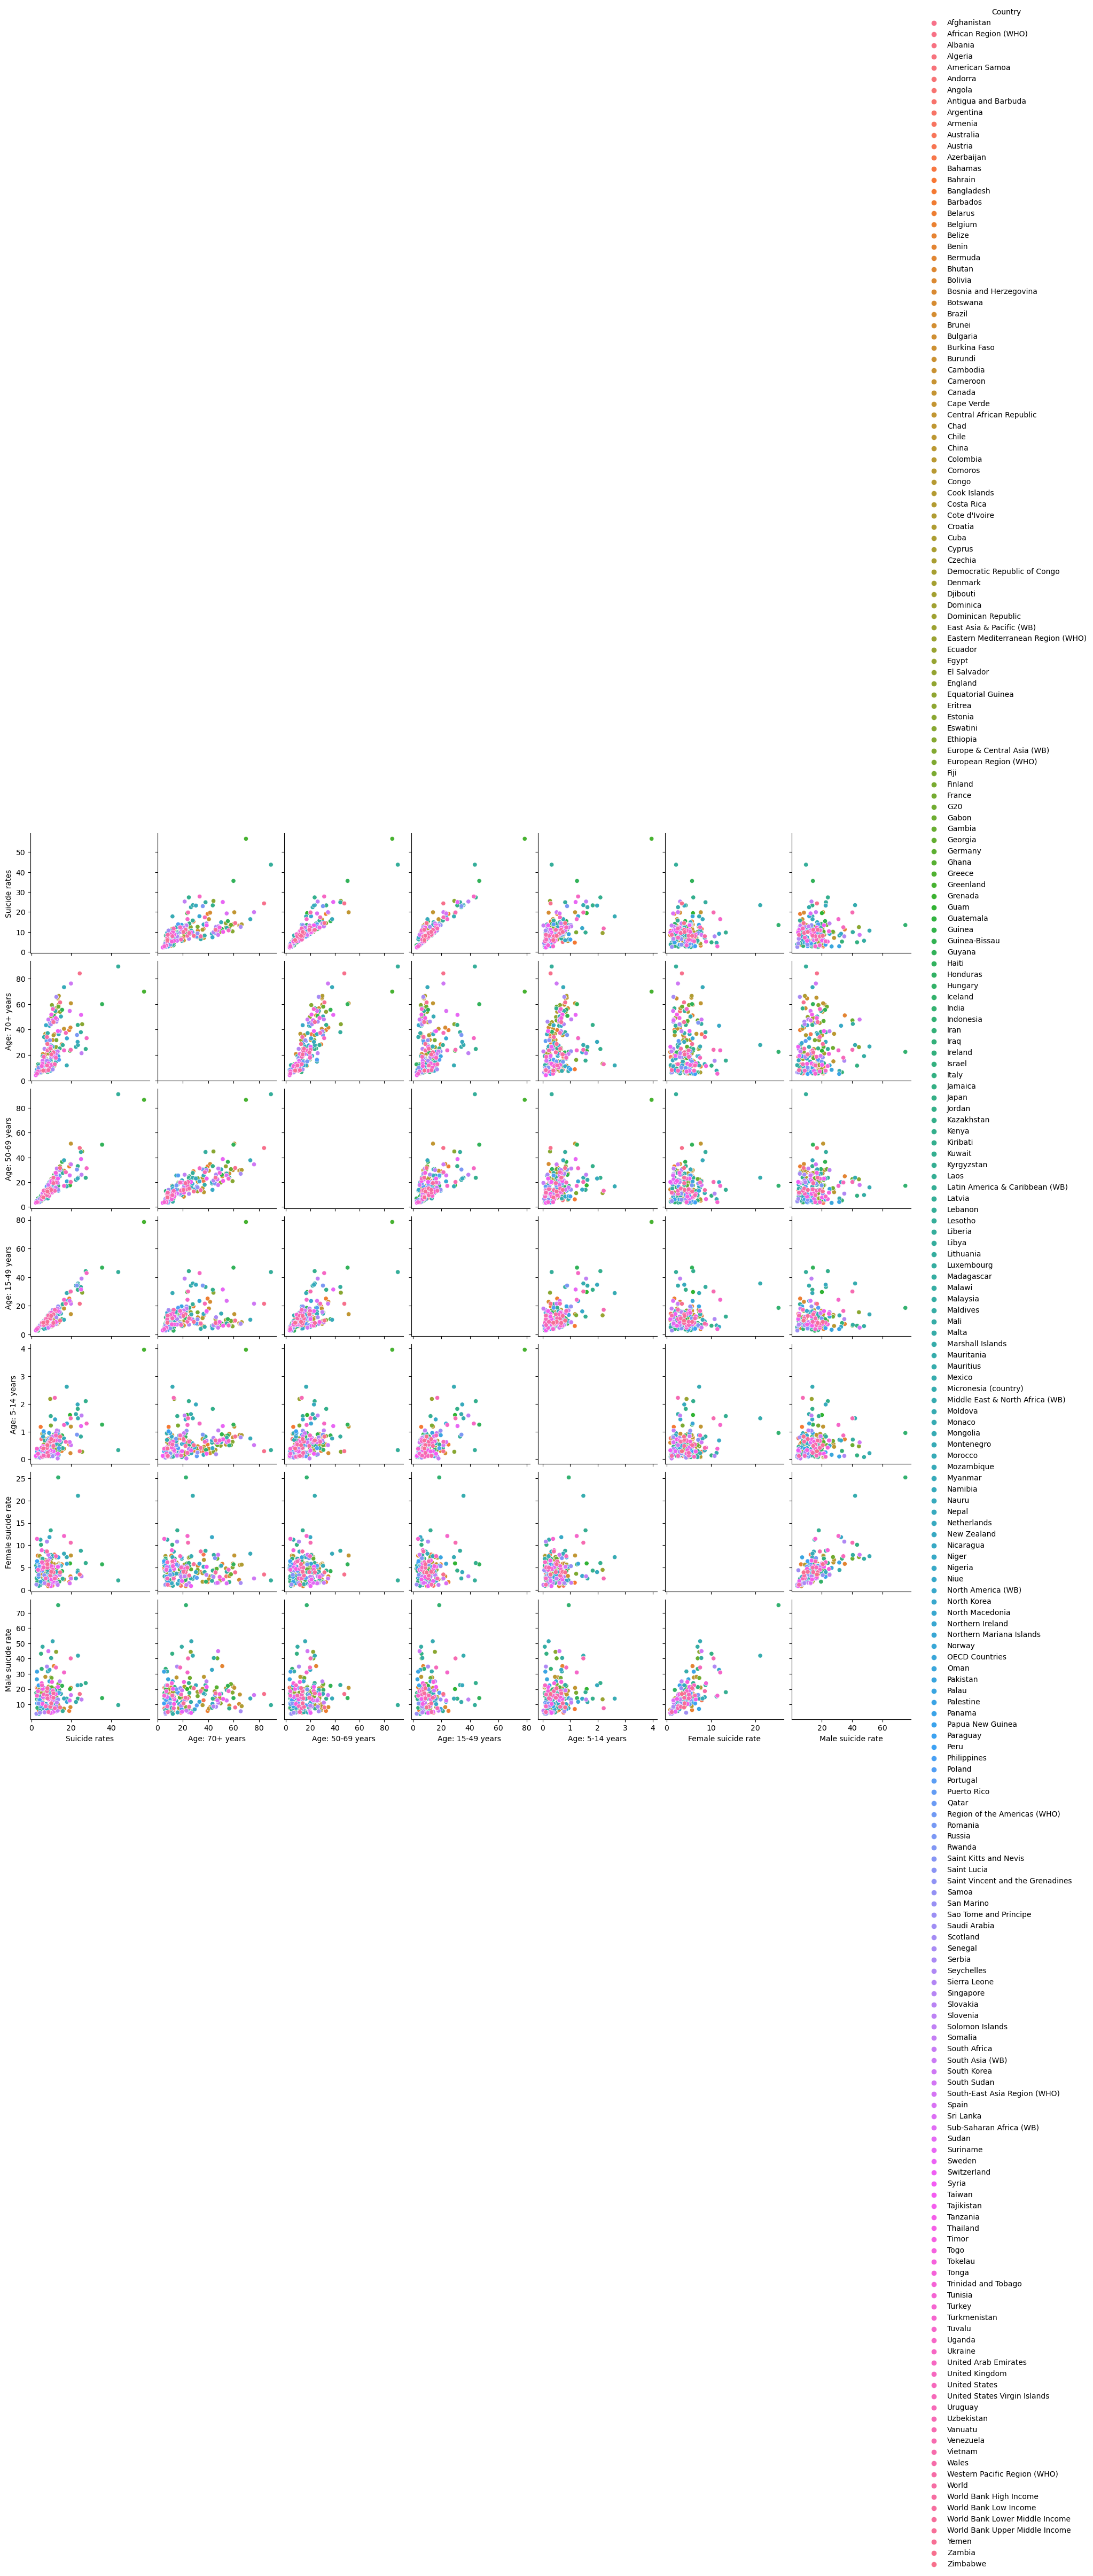

In [8]:
sns.pairplot(data, hue='Country')

It is hard to decipher some meaning from the above plotted charts. What I can see from a first glance is that the majority (>50%) of ountries seem to experience the same number of deaths within a range. There are other countries which experience higher levels of fatalities. This information could be useful when trying to assess then what is the difference between those countries which experience higher levels of fatalities from those countries who experience less. This may be beyond the scope of this project but is definitely something worth noting and bearing in mind for future work. 

Thinking about the above and from looking at the OurWorldinData site a better way of representing the data might be through bar charts or histograms. I've gone with bar charts based on this article. 
https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts#:~:text=Histograms%20visualize%20quantitative%20data%20or,an%20axis%20would%20be%20foolish.

<AxesSubplot:xlabel='Country', ylabel='Suicide rates'>

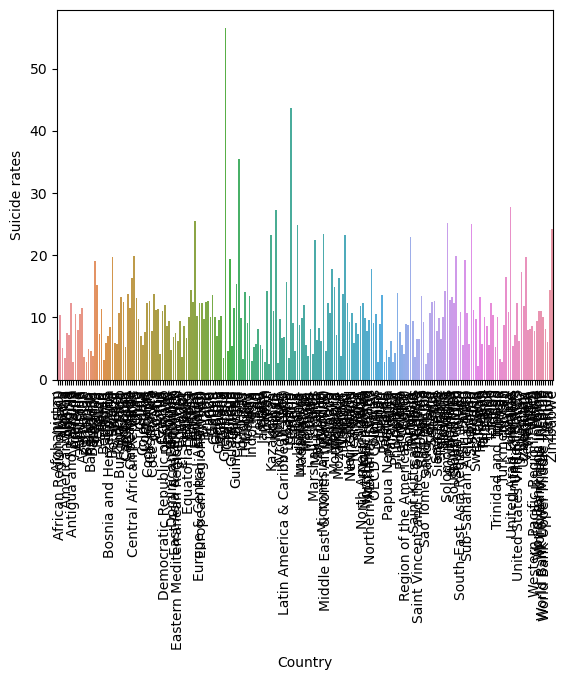

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#https://stackoverflow.com/questions/35916976/plot-wont-show-in-jupyter

plt.xticks(rotation=90)
#https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/
sns.barplot(data=data, x="Country", y="Suicide rates")
# https://seaborn.pydata.org/generated/seaborn.barplot.html

In [24]:
plt.figure(figsize=(50,20))
#https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/setting-figure-size-matplotlib-seaborn.html
plt.xticks(rotation=45)
#https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/

sns.set_context("talk", font_scale=0.5)
#https://seaborn.pydata.org/generated/seaborn.set_context.html
sns.barplot(data=data, x="Country", y="Suicide rates")


<AxesSubplot:xlabel='Country', ylabel='Suicide rates'>